In [0]:
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
from keras.datasets import mnist

import pandas as pd

from sklearn.preprocessing import OneHotEncoder

In [0]:
mnist = pd.read_csv("sample_data/mnist_train_small.csv").values

X, y = mnist[:, 1:], mnist[:, 0]

ohe = OneHotEncoder(categories="auto")

y_hot = ohe.fit_transform(y.reshape(-1, 1))

In [6]:
in_layer = Input((28, 28, 1))
con1 = Conv2D(16, (3, 3), activation="relu")(in_layer)
p1 = MaxPooling2D()(con1)
con2 = Conv2D(32, (3, 3), activation="relu")(p1)
p2 = MaxPooling2D()(con2)
flat = Flatten()(p2)
d1 = Dense(400, activation="sigmoid", name="chacha")(flat)
d2 = Dense(100, activation="sigmoid", name="mama")(d1)
d3 = Dense(10, activation="softmax", name="taya")(d2)

In [0]:
model = Model(in_layer, d3)

In [8]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
model.fit(X.reshape(-1, 28, 28, 1), y_hot, epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





19999/19999 [==============================] - 15s 773us/step - loss: 0.3569 - acc: 0.9201
Epoch 2/5
19999/19999 [==============================] - 15s 727us/step - loss: 0.0786 - acc: 0.9773
Epoch 3/5
19999/19999 [==============================] - 14s 711us/step - loss: 0.0572 - acc: 0.9830
Epoch 4/5
19999/19999 [==============================] - 14s 709us/step - loss: 0.0461 - acc: 0.9869
Epoch 5/5
19999/19999 [==============================] - 14s 722us/step - loss: 0.0377 - acc: 0.9889


In [10]:
model.evaluate(X.reshape(-1, 28, 28, 1), y_hot)

19999/19999 [==============================] - 4s 207us/step


[0.03572733825451434, 0.9895994799739987]

In [12]:
model.layers

In [0]:
m2 = Model(model.input, model.layers[-5].output)

In [32]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
chacha (Dense)               (None, 400)               3204

In [0]:
out = m2.predict(X.reshape(-1, 28, 28, 1)[:2])

In [0]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


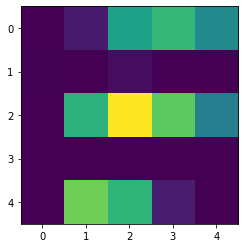

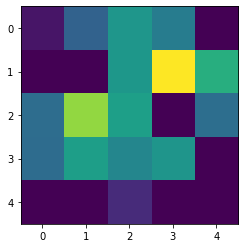

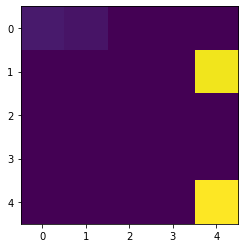

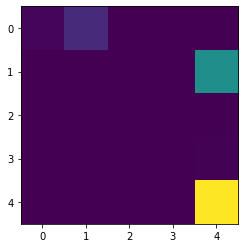

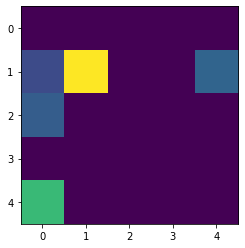

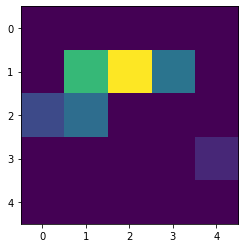

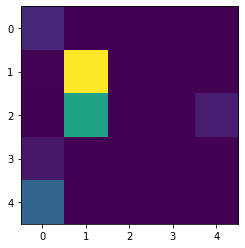

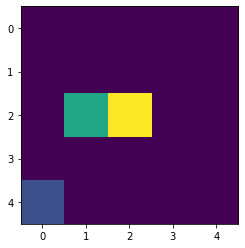

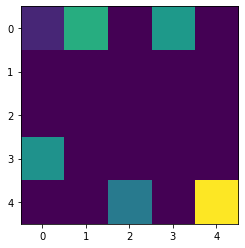

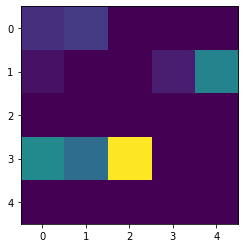

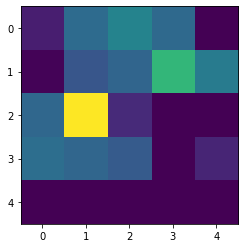

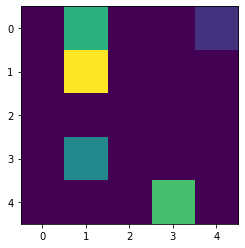

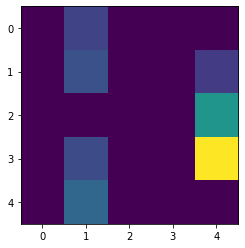

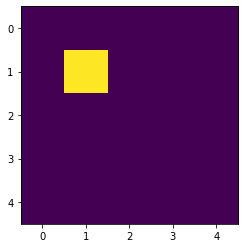

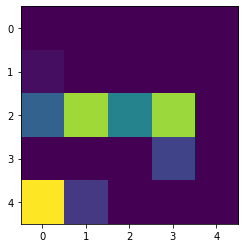

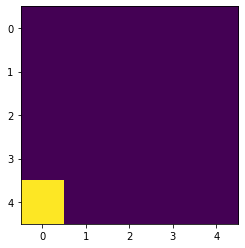

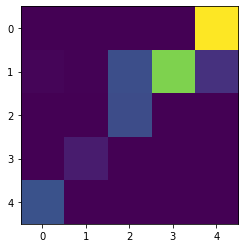

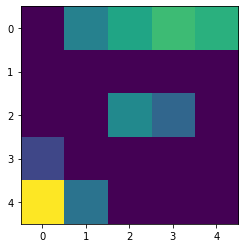

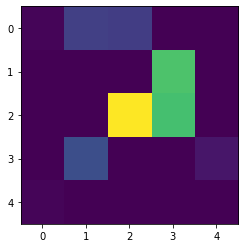

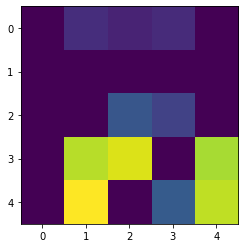

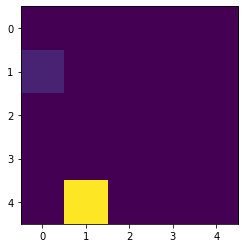

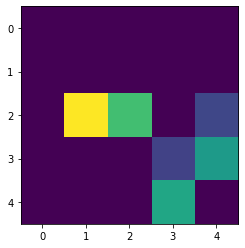

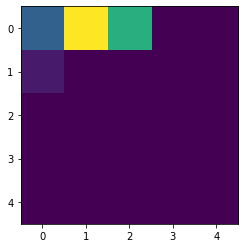

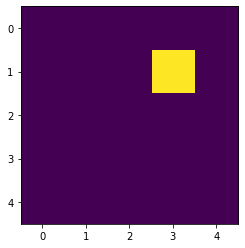

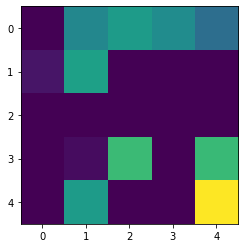

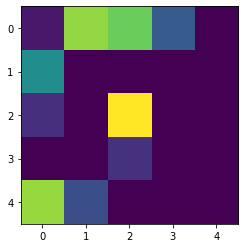

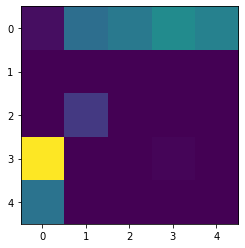

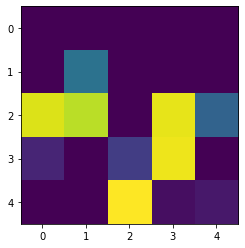

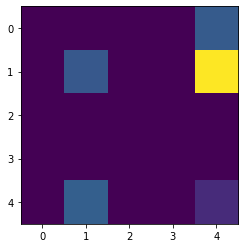

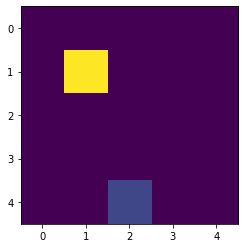

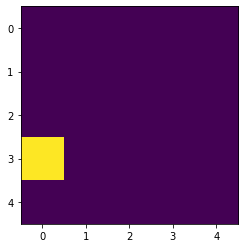

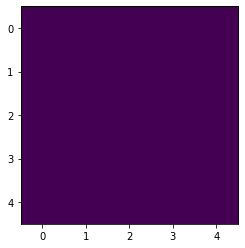

In [35]:
for batch in out:
  for i in range(16):
    plt.figure()
    plt.imshow(batch[:,:, i])